# Introduction to NetworkX

In this course we will use the **NetworkX library** for working with networks. This notebook is meant as a very short and basic introduction to using this library. For more information see https://networkx.org/documentation/stable/index.html or https://networkx.org/documentation/stable/tutorial.html for a quick introduction to using the library.

We begin with loading in the library

In [1]:
import networkx as nx

## Creating a graph

The first thing we need to do is create a graph. This is done by first using the `Graph` function of NetworkX to create a graph object. Then we add nodes to this graphs using `add_node` and finally we create edges using `add_edges`.

Below is an example code that creates a triangle graph.

In [2]:
### To create a new network from scratch we use the Graph function.

triangle_graph = nx.Graph()

### This network has no nodes or edges. So lets start by adding three nodes.
triangle_graph.add_node(1)
triangle_graph.add_node(2)
triangle_graph.add_node(3)

### Next we add edges to make this network into a triangle
triangle_graph.add_edge(1,2)
triangle_graph.add_edge(2,3)
triangle_graph.add_edge(3,1)

Once a graph is created we can access the nodes and edges in the graph using the `nodes` and `edges` functions. The `nodes` function returns an list with the node labels. The `edges` function returns a lists if *edges* where each edge is again a list of lenght 2.

In [3]:
### List all nodes and edges in the graph

for node in triangle_graph.nodes():
    print(f"Node {node} is part of the graph")
    
for edge in triangle_graph.edges():
    print(f"Edge {edge} is part of the graph and connects {edge[0]} with {edge[1]}")

Node 1 is part of the graph
Node 2 is part of the graph
Node 3 is part of the graph
Edge (1, 2) is part of the graph and connects 1 with 2
Edge (1, 3) is part of the graph and connects 1 with 3
Edge (2, 3) is part of the graph and connects 2 with 3


Instead of first adding each node to the graph and then the edges, we can simply start with adding edges. This is because when an edge is added using `add_edge` each node that is not yet part of the graph is added automatically. Note that this way you will never have a node with $d_i=0$.

In [4]:
### Create the network object
triangle_graph_alt = nx.Graph()

### Now we directly add the edges to make this network into a triangle
triangle_graph_alt.add_edge(1,2)
triangle_graph_alt.add_edge(2,3)
triangle_graph_alt.add_edge(3,1)


### Let's check that all nodes are part of the graph
for node in triangle_graph_alt.nodes():
    print(f"Node {node} is part of the graph")

Node 1 is part of the graph
Node 2 is part of the graph
Node 3 is part of the graph


## Accessing neighbors of nodes

When we have a graph we can also list neighbors of given nodes and loop through them. For this we use the `adj` function which returns a dictionary where each entry has a key corresponding to the label of neighbors of a given node. For example `adj[i]` is has as keys the labels of the neighbors of the node whose label is $i$. 

To demonstrate we will create a graph on 4 nodes that form a square and list all neighbors of node $1$.

In [5]:
### Create the square graph
square_graph = nx.Graph()

square_graph.add_edge(1,2)
square_graph.add_edge(2,3)
square_graph.add_edge(3,4)
square_graph.add_edge(4,1)

### Retreive the list of neighbors of node 1
neighbors = square_graph.adj[1]

### The length of the neighbors is equal to the degree of the node
### NOTE: In general it is better to use G.degree[1] to get the degree of node 1
print(f"Number of neighbors of node {1} is {len(neighbors)}")

### We can access each neighbor in a loop as follows

print(f"Node {1} is connected to the following nodes:")
for neighbor in neighbors:
    print(f"\t node {neighbor}")

Number of neighbors of node 1 is 2
Node 1 is connected to the following nodes:
	 node 2
	 node 4


We can also loop through all nodes and their neighbors simultaniously using `adjacency`. An example is given below. Note that since the graph is undirected, each edge is visited twice.

In [6]:
### Loop over all nodes in the square and their neighbors.
for node,neighbors in square_graph.adjacency():
    print(f"Node {node} is connected to:")
    for neighbor in neighbors:
        print(f"\t node {neighbor}")

Node 1 is connected to:
	 node 2
	 node 4
Node 2 is connected to:
	 node 1
	 node 3
Node 3 is connected to:
	 node 2
	 node 4
Node 4 is connected to:
	 node 3
	 node 1


## Exercises

**Exercise 1**
This exercise will help you to practice a bit with the basic functions.

1. Create a graph using the code below.
2. List all nodes that are neighbors of node $17$ and node $71$.
3. Check if there exists a triangle between nodes $3$, $5$ and $7$. If not, add this triangle to the graph.

In [7]:
### Generate a graph with 100 nodes
graph = nx.erdos_renyi_graph(100,0.2)

### Note that the nodes are labeled 0 - 99
print(graph.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99]


In [8]:
neighbors = graph.adj[17]
print("For node 17, these are the neighbors:")
for neighbor in neighbors:
    print(f"\t node {neighbor}")
    
neighbors = graph.adj[71]
print("For node 71, these are the neighbors:")
for neighbor in neighbors:
    print(f"\t node {neighbor}")
    


For node 17, these are the neighbors:
	 node 0
	 node 1
	 node 2
	 node 5
	 node 8
	 node 10
	 node 11
	 node 18
	 node 24
	 node 28
	 node 32
	 node 45
	 node 50
	 node 53
	 node 54
	 node 63
	 node 65
	 node 70
	 node 71
	 node 79
	 node 90
	 node 92
For node 71, these are the neighbors:
	 node 0
	 node 1
	 node 2
	 node 7
	 node 10
	 node 14
	 node 17
	 node 18
	 node 29
	 node 34
	 node 42
	 node 44
	 node 45
	 node 46
	 node 50
	 node 58
	 node 59
	 node 61
	 node 63
	 node 68
	 node 76
	 node 79
	 node 85
	 node 90
	 node 93
	 node 98


In [9]:
for node,neighbors in graph.adjacency():
    if(node==3):
        print(f"Node {node} is connected to:")
        for neighbor in neighbors:
            if (int(neighbor)==5 or int(neighbor)==7):
                print(f"neighbor of node 3 is {neighbor}")
    elif(node==5):
        print(f"Node {node} is connected to:")
        for neighbor in neighbors:
            if (int(neighbor)==3 or int(neighbor)==7):
                print(f"neighbor of node {node} is {neighbor}")
                
    elif(node==7):
        print(f"Node {node} is connected to:")
        for neighbor in neighbors:
            if (int(neighbor)==3 or int(neighbor)==5):
                print(f"neighbor of node {node} is {neighbor}")
                
print("Added edges\n")         
graph.add_edge(3,5)
graph.add_edge(5,7)
graph.add_edge(7,3)

for node,neighbors in graph.adjacency():
    if(node==3):
        print(f"Node {node} is connected to:")
        for neighbor in neighbors:
            if (int(neighbor)==5 or int(neighbor)==7):
                print(f"neighbor of node 3 is {neighbor}")
    elif(node==5):
        print(f"Node {node} is connected to:")
        for neighbor in neighbors:
            if (int(neighbor)==3 or int(neighbor)==7):
                print(f"neighbor of node {node} is {neighbor}")
                
    elif(node==7):
        print(f"Node {node} is connected to:")
        for neighbor in neighbors:
            if (int(neighbor)==3 or int(neighbor)==5):
                print(f"neighbor of node {node} is {neighbor}")

Node 3 is connected to:
neighbor of node 3 is 7
Node 5 is connected to:
neighbor of node 5 is 7
Node 7 is connected to:
neighbor of node 7 is 3
neighbor of node 7 is 5
Added edges

Node 3 is connected to:
neighbor of node 3 is 7
neighbor of node 3 is 5
Node 5 is connected to:
neighbor of node 5 is 7
neighbor of node 5 is 3
Node 7 is connected to:
neighbor of node 7 is 3
neighbor of node 7 is 5


**Exercise 2**
Up to now we have dealt only with undirected graphs but NetworkX also allows for directed graphs. To create a directed graph we need to use `DiGraph` instead of `Graph`. 

Create a directed graph on 5 nodes such that they form a cycle, i.e. node $i$ is connected to $(i+1) \mod 5$. Check your code by listing for each node its out-neighbors and in-neighbors. For this you can use the `successors` and `predecessors` function. 

In [10]:
### Solution

G = nx.DiGraph()

# Step 2: Add edges to form a cycle (0 -> 1 -> 2 -> 3 -> 4 -> 0)
nodes = 5
for i in range(nodes):
    G.add_edge(i, (i + 1) % nodes)

# Step 3: Print out-neighbors (successors) and in-neighbors (predecessors) for each node
for node in G.nodes:
    out_neighbors = list(G.successors(node))  # Out-neighbors of the current node
    in_neighbors = list(G.predecessors(node))  # In-neighbors of the current node
    print(f"Node {node}: Out-neighbors (successors) -> {out_neighbors}, In-neighbors (predecessors) -> {in_neighbors}")

Node 0: Out-neighbors (successors) -> [1], In-neighbors (predecessors) -> [4]
Node 1: Out-neighbors (successors) -> [2], In-neighbors (predecessors) -> [0]
Node 2: Out-neighbors (successors) -> [3], In-neighbors (predecessors) -> [1]
Node 3: Out-neighbors (successors) -> [4], In-neighbors (predecessors) -> [2]
Node 4: Out-neighbors (successors) -> [0], In-neighbors (predecessors) -> [3]


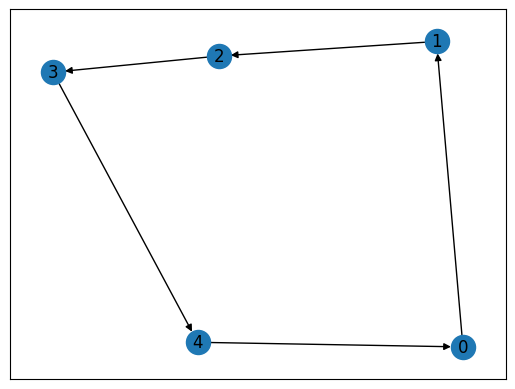

In [11]:
nx.draw_networkx(G)